In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.5/939.5 kB 1.7 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 11.0 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.7-py3-none-any.whl size=138904 sha256=ad7447fb5709efec505cfd40d7fe0132c7d15cf83e8d5d447b077eba879e1b8f
  Stored in directory: /Users/malathidamodara/Library/Caches/pip/wheels/d8/b7/b5/bc5cfc21613ff88ce55cf4151a9f32e23bd8f4a2c4d51e7c8b
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [83]:
data = yf.download("AAPL", start="2020-01-01", end="2024-01-01")
data["Date"] = data.index
data["SMA_50"] = data["Close"].rolling(window=50).mean()  
data["SMA_200"] = data["Close"].rolling(window=200).mean() 
data.dropna(inplace=True)


[*********************100%***********************]  1 of 1 completed


In [87]:
data["SMA_50"]=data["Close"].rolling(window=50).mean()
data["SMA_200"]=data["Close"].rolling(window=200).mean()
data.dropna(inplace=True)

X=data[["SMA_50","SMA_200"]]
y=data["Close"]



In [93]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [95]:
from sklearn.ensemble import RandomForestRegressor
regressor= RandomForestRegressor(n_estimators=100,random_state=42)
regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [115]:
y_pred=regressor.predict(X_test)
print(y_pred)

[140.53939957 145.97079819 150.01369507 149.33520035 161.39029663
 146.36569885 188.06639648 164.08780197 174.41319397 160.8789016
 149.9856044  164.75009979 190.6934993  177.75379639 130.15129829
 152.17610382 178.15310333 156.16900513 144.90179947 157.16280533
 177.80649734 166.32669464 147.6203978  157.66349976 151.0768985
 160.01980057 173.41940323 152.0573024  190.17900009 138.88159927
 196.22820343 157.79029922 163.99999702 145.00530258 166.65130493
 171.99720169 195.42550095 175.59409866 146.79479797 179.50310532
 153.76559723 164.30359909 189.56909378 180.71900085 158.66690109
 181.7099025  177.29110306 176.3471051  149.464198   175.45230301
 164.9259967  147.05050049 157.12339676 139.09250137 152.0573024
 131.24830048 132.18829971 174.7499054  136.04789749 166.41490417
 152.63809708 194.59069534 179.57950378 157.29930511 171.59199509
 160.03660095 153.29779495 136.8496991  143.56550369 135.44410355
 172.68319916 147.87669662 187.04669464 190.44409668 152.80170273
 173.12770401

In [117]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
regressor_sq_error=np.sqrt(mean_squared_error(y_test,y_pred))
print(f"Random Forest Regressor mean squared error is: {regressor_sq_error}")

Random Forest Regressor mean squared error is: 4.030057137317021


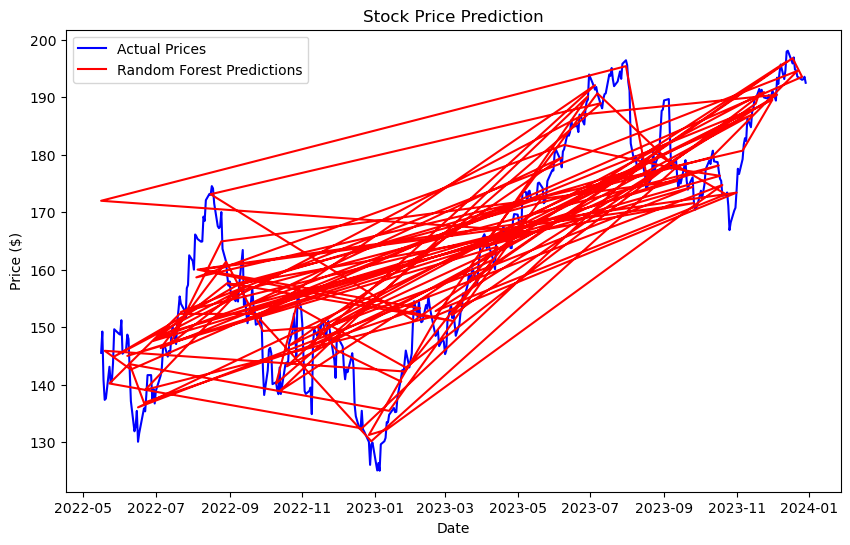

In [121]:
plt.figure(figsize=(10, 6))
plt.plot(data["Close"], label="Actual Prices", color="blue")   
plt.plot(X_test.index, y_pred, label="Random Forest Predictions", color="red")
plt.title("Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()